In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
import warnings
warnings.filterwarnings('ignore')


In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [3]:
os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day40\\')

In [4]:
df=pd.read_csv('Solar Data Set.csv')
display(df)

,Date,Solar Ir
0,1/1/2019 0:00,0.0
1,1/1/2019 1:00,0.0
2,1/1/2019 2:00,0.0
3,1/1/2019 3:00,0.0
4,1/1/2019 4:00,0.0
...,...,...
8755,12/31/2019 19:00,0.0
8756,12/31/2019 20:00,0.0
8757,12/31/2019 21:00,0.0
8758,12/31/2019 22:00,0.0


In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [6]:
# Drop Missing values (No missing values in curreny data)

df.dropna(inplace=True)
display(df.shape)

(8760, 2)

In [7]:
# Train Test Split (2 Days of data will be test data)

training_set=df.iloc[:8712,1:2].values
test_set=df.iloc[8712:,1:2].values
display(training_set.shape)
display(test_set.shape)

(8712, 1)

(48, 1)

In [8]:
training_set

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [9]:
test_set

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01693333],
       [0.09424507],
       [0.1371626 ],
       [0.15909154],
       [0.16490746],
       [0.15638263],
       [0.13107571],
       [0.08334421],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01664971],
       [0.09403712],
       [0.13707843],
       [0.15912329],
       [0.16504743],
       [0.15665653],
       [0.1315364 ],
       [0.08412501],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [10]:
# Standardization

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
test_set_scales=sc.fit_transform(test_set)

In [11]:
training_set_scaled

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [12]:
len(training_set_scaled)

8712

In [13]:
training_set

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [14]:
test_set

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01693333],
       [0.09424507],
       [0.1371626 ],
       [0.15909154],
       [0.16490746],
       [0.15638263],
       [0.13107571],
       [0.08334421],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01664971],
       [0.09403712],
       [0.13707843],
       [0.15912329],
       [0.16504743],
       [0.15665653],
       [0.1315364 ],
       [0.08412501],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [15]:
# Set up Look back window
'''Initialize'''

x_train=[]
y_train=[]
WS=24 # window size,atleast look back 24 hour (one day) to do prediction

In [16]:
'''For Loop to create the data for look back, it create a sub set of lists to predict the 25th value from previouse 24 values'''

for i in range(WS,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-WS:i,0:1])
    y_train.append(training_set_scaled[i,0])

In [17]:
# Length of the list

print('X Train Length:',len(x_train))
print('Y Train Length:',len(y_train))

X Train Length: 8688
Y Train Length: 8688


In [18]:
8712-24

8688

In [19]:
x_train

[array([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.08825763],
        [0.5036841 ],
        [0.73535219],
        [0.85436419],
        [0.88684977],
        [0.84271909],
        [0.70919407],
        [0.45698482],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]),
 array([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.08825763],
        [0.5036841 ],
        [0.73535219],
        [0.85436419],
        [0.88684977],
        [0.84271909],
        [0.70919407],
        [0.45698482],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [20]:
y_train

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08776750512689573,
 0.5030371354796426,
 0.7352139236613143,
 0.8547784479887766,
 0.8878111338748954,
 0.8443984099435123,
 0.7119014568777784,
 0.46148719520233383,
 0.00011666136820273181,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08772680742882817,
 0.5025970218579373,
 0.7352127377183723,
 0.8552979822237993,
 0.8888615680786576,
 0.8461649014701969,
 0.7147047845113234,
 0.46611336006795745,
 0.011417786415926204,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08812741466166556,
 0.5023630476578523,
 0.7353476132383129,
 0.8559211281616556,
 0.8899984741582979,
 0.8480147846408648,
 0.7175982974710449,
 0.47085302664927553,
 0.02317138786974414,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08895874456530914,
 0.5023339518088383,
 0.735617230121753,
 0.8566460129784229,
 0.891219088491123

In [21]:
# Convert List to array

'''
x_train  will be a three dimensional array-(8688,24,1)'''

x_train,y_train=np.array(x_train),np.array(y_train)
display(x_train.shape)
display(y_train.shape)

(8688, 24, 1)

(8688,)

In [22]:
# Display X_train as Data Frame

# Each rows has the previous data used to predict the value

display(pd.DataFrame(x_train.reshape(8688,24)))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.088258,0.503684,...,0.709194,0.456985,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.088258,0.503684,0.735352,...,0.456985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.088258,0.503684,0.735352,0.854364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.088258,0.503684,0.735352,0.854364,0.886850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.088258,0.503684,0.735352,0.854364,0.886850,0.842719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.507068,0.736642,0.853666,0.884281,0.837817,0.701025,0.443209,0.0,0.0,0.0
8684,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.736642,0.853666,0.884281,0.837817,0.701025,0.443209,0.000000,0.0,0.0,0.0
8685,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.853666,0.884281,0.837817,0.701025,0.443209,0.000000,0.000000,0.0,0.0,0.0
8686,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.884281,0.837817,0.701025,0.443209,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [23]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [24]:
# Create Input Layer

Model_P=Sequential()
Model_P.add(LSTM(units=60,return_sequences=True,input_shape=(x_train.shape[1],1)))
Model_P.add(Dropout(0.2))

In [25]:
# Hidden Layer - 1

Model_P.add(LSTM(units=60,return_sequences=True))
Model_P.add(Dropout(0.2))

In [26]:
# Hidden Layer -2

Model_P.add(LSTM(units=60,return_sequences=True))
Model_P.add(Dropout(0.20))

In [27]:
# Hidden Layer -3  This is the last hidden layer no need to specify return_sequences

Model_P.add(LSTM(units=60))
Model_P.add(Dropout(0.2))

In [28]:
# Output Layer

Model_P.add(Dense(units=1))

In [29]:
# Compile the model

# Adam optimizer good for time series

Model_P.compile(optimizer='adam',loss='mean_squared_error')

In [33]:
# Fit the Model

# The Loss is getting dropped after every epoch

Model_P.fit(x_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0015
Epoch 2/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0012
Epoch 3/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0011
Epoch 4/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0013
Epoch 5/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0012
Epoch 6/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0011
Epoch 7/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0011
Epoch 8/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0012
Epoch 9/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0011
Epoch 10/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0011
Epoch 11/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0011
Epoch 12/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0013
Epoch 13/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 9.4253e-04
Epoch 14/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0010
Epoch 15/30
272/272 ━━━━━━━━━━━━━━━━━━━

In [36]:
# Prediction for test data set

# Extract last 24 hours of data

prediction_test=[]
Batch_one=test_set_scales[-WS:]
Batch_New=Batch_one.reshape((1,WS,1)) # Extract last 24 records from training

In [37]:
# Prediction for 48 periods

# Generate each 24 values and predict for future

for i in range(48):
    First_Pred=Model_P.predict(Batch_New)[0]
    prediction_test.append(First_Pred)
    Batch_New=np.append(Batch_New[:,1:,:],[[First_Pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 52s 52s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [38]:
# Convert Prediction List to array

prediction_test=np.array(prediction_test)
display(prediction_test)

array([[-6.4680278e-03],
       [-6.8283975e-03],
       [-6.9187880e-03],
       [-6.7487657e-03],
       [-6.3755214e-03],
       [-5.8731437e-03],
       [-5.1967502e-03],
       [-2.7765334e-03],
       [ 1.9286256e-01],
       [ 6.1979330e-01],
       [ 8.4112453e-01],
       [ 9.2850149e-01],
       [ 9.4608396e-01],
       [ 8.8797826e-01],
       [ 7.4312115e-01],
       [ 4.8152477e-01],
       [-6.6205859e-04],
       [-1.1300445e-03],
       [-1.9308925e-03],
       [-2.6975274e-03],
       [-3.3541918e-03],
       [-4.0869713e-03],
       [-4.9264729e-03],
       [-5.7020783e-03],
       [-6.2662661e-03],
       [-6.6612363e-03],
       [-6.7881942e-03],
       [-6.6478550e-03],
       [-6.2917769e-03],
       [-5.7810545e-03],
       [-5.0055087e-03],
       [-6.3174963e-04],
       [ 2.4954665e-01],
       [ 6.5038455e-01],
       [ 8.4058428e-01],
       [ 9.1295296e-01],
       [ 9.2227840e-01],
       [ 8.6585462e-01],
       [ 7.2178471e-01],
       [ 4.6301436e-01],


In [39]:
# The Predicted value is scaled value,convert prediction values to orginal value by inverse transform

prediction=sc.inverse_transform(prediction_test)
display(prediction)

array([[-1.06753130e-03],
       [-1.12700940e-03],
       [-1.14192814e-03],
       [-1.11386646e-03],
       [-1.05226343e-03],
       [-9.69347253e-04],
       [-8.57710256e-04],
       [-4.58259688e-04],
       [ 3.18314694e-02],
       [ 1.02295287e-01],
       [ 1.38825446e-01],
       [ 1.53246775e-01],
       [ 1.56148717e-01],
       [ 1.46558523e-01],
       [ 1.22650236e-01],
       [ 7.94744268e-02],
       [-1.09271066e-04],
       [-1.86510923e-04],
       [-3.18688835e-04],
       [-4.45219950e-04],
       [-5.53600723e-04],
       [-6.74544077e-04],
       [-8.13101651e-04],
       [-9.41113336e-04],
       [-1.03423104e-03],
       [-1.09941990e-03],
       [-1.12037396e-03],
       [-1.09721138e-03],
       [-1.03844155e-03],
       [-9.54148185e-04],
       [-8.26146337e-04],
       [-1.04268649e-04],
       [ 4.11870331e-02],
       [ 1.07344292e-01],
       [ 1.38736278e-01],
       [ 1.50680542e-01],
       [ 1.52219683e-01],
       [ 1.42907083e-01],
       [ 1.1

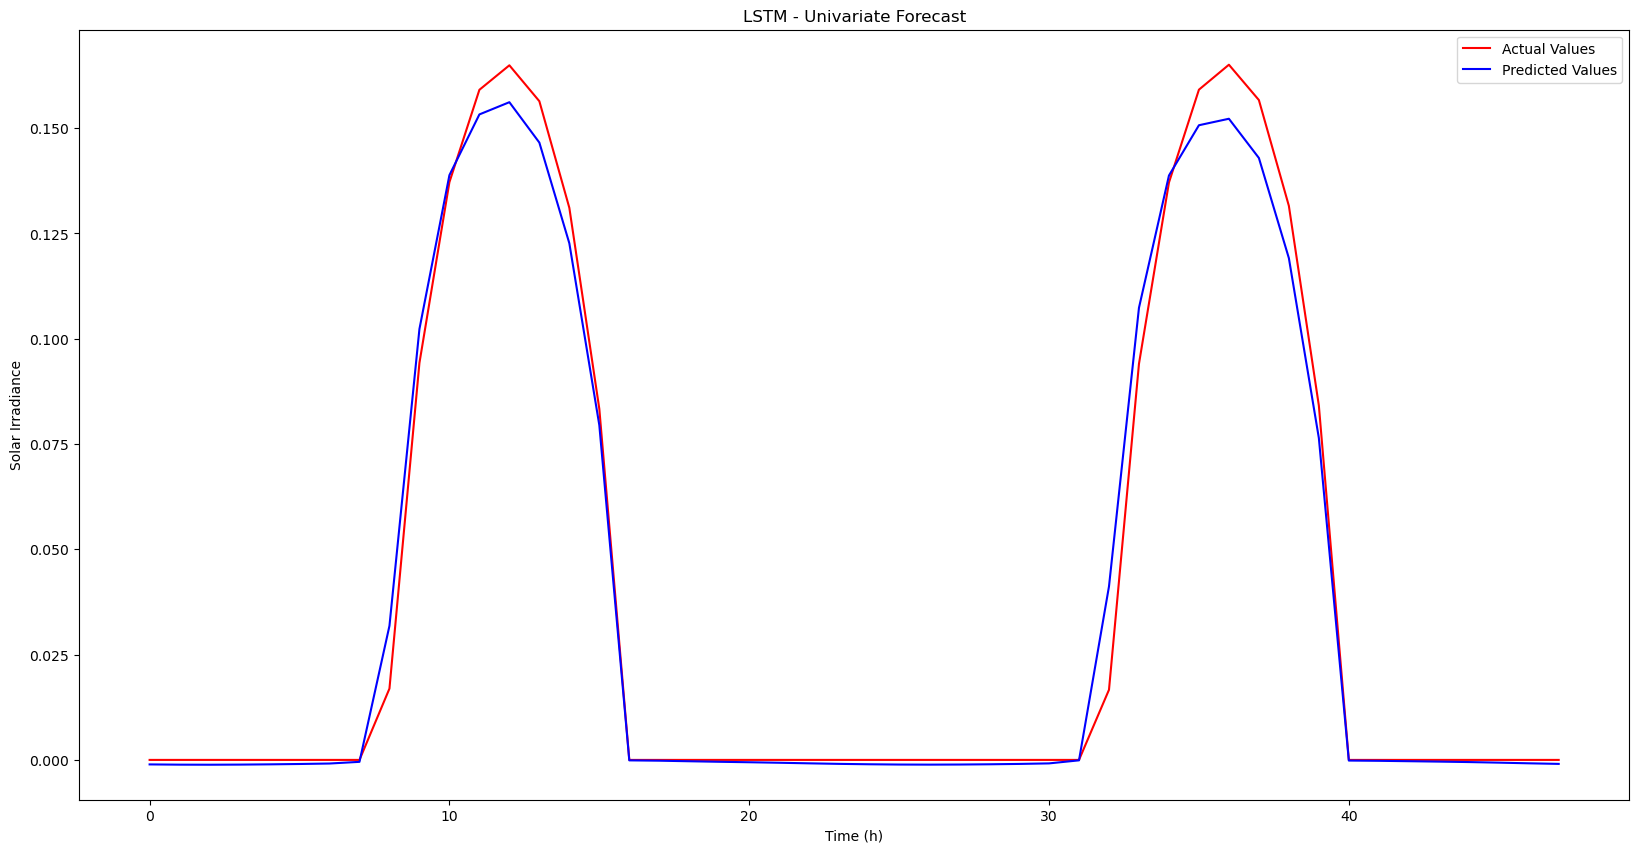

In [40]:
# Plot the graph with actual and preicted values

plt.plot(test_set,color='red',label='Actual Values')
plt.plot(prediction,color='blue',label='Predicted Values')
plt.title('LSTM - Univariate Forecast')
plt.xlabel('Time (h)')
plt.ylabel('Solar Irradiance')
plt.legend()
plt.show()

In [41]:
# Display RMSE

import math
from sklearn.metrics import mean_squared_error
RMSE=math.sqrt(mean_squared_error(test_set,prediction))
display(RMSE)

0.006492895397796326

In [42]:
# Display - Accuracy - R2 Score

from sklearn.metrics import r2_score
Rsquare=r2_score(test_set,prediction)
display(Rsquare)

0.9890171132218794

In [43]:
'''Ok Prajwal Ghotkar'''

'Ok Prajwal Ghotkar'